In [2]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 116kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=6c20f845aad4b5d0a13fc64ef494a803cb65a8b51d7397e3ee60d2714e35e972
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [3]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, exposure
import cv2

In [6]:
image = cv2.imread('/keanu.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

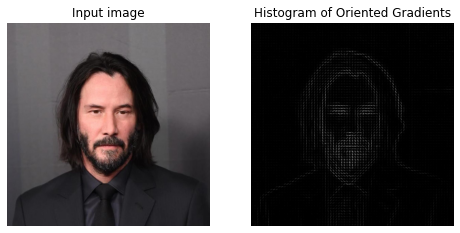

In [7]:
fd, hog_image = hog(image, orientations=8, pixels_per_cell = (16,16), cells_per_block = (1,1), visualize=True, multichannel=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0,10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [8]:
image.shape

(1200, 1200, 3)

**FACE DETECTION**

In [10]:
import face_recognition
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline

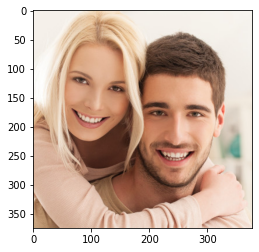

In [21]:
image = cv2.imread('/mult.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [22]:
face_locations = face_recognition.face_locations(image)
number_of_faces = len(face_locations)
print("Found {} face(s) in input image.".format(number_of_faces))

Found 2 face(s) in input image.


A face is located at pixel location Top: 167, Left: 133, Bottom: 322, Right: 288
A face is located at pixel location Top: 29, Left: 81, Bottom: 184, Right: 236


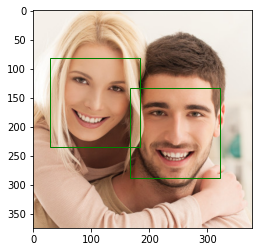

In [23]:
plt.imshow(image)
ax = plt.gca()

for face_location in face_locations:
  top, right, bottom, left = face_location
  x, y, w, h = left, top, right, bottom
  print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(x, y, w, h))
  rect = Rectangle((x, y), w-x, h-y, fill=False, color='green')
  ax.add_patch(rect)

plt.show()


**FACE RECOGNITION**

In [24]:
import face_recognition
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
import numpy as np
import cv2
%matplotlib inline

In [26]:
image = cv2.imread('/keanu.jpg')
keanu = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.imread('/chris.jpg')
chris = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.imread('/rdj.jpg')
rdj = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


In [28]:
keanu_encoding = face_recognition.face_encodings(keanu)[0]
chris_encoding = face_recognition.face_encodings(chris)[0]
rdj_encoding = face_recognition.face_encodings(rdj)[0]

known_face_encodings = [keanu_encoding, chris_encoding, rdj_encoding]

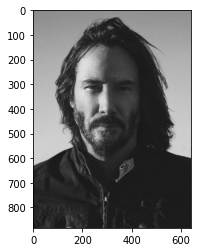

In [35]:
image = cv2.imread('/keanu_1.jpg')
unknown_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(unknown_image)

unknown_face_encodings = face_recognition.face_encodings(unknown_image)

In [36]:

from scipy.spatial import distance

for unknown_face_encoding in unknown_face_encodings:
  results = []
  for known_face_encoding in known_face_encodings:
    d = distance.euclidean(known_face_encoding, unknown_face_encoding)
    results.append(d)
  threshold = 0.6
  results = np.array(results) <= threshold

  name = "Unknown"

  if results[0]:
    name = "Keanu"
  elif results[1]:
    name = "Chris"
  elif results[2]:
    name = "RDJ"
  
  print(f"Found {name} in the photo!")


Found Keanu in the photo!


**FACE LANDMARK**

In [37]:
face_landmarks_list = face_recognition.face_landmarks(image)

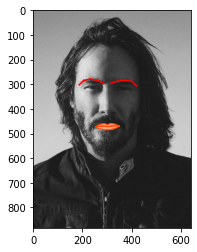

In [42]:
import matplotlib.lines as mlines
from matplotlib.patches import Polygon

plt.imshow(image)
ax = plt.gca()

for face_landmarks in face_landmarks_list:

  left_eyebrow_pts = face_landmarks['left_eyebrow']
  pre_x, pre_y = left_eyebrow_pts[0]
  for (x,y) in left_eyebrow_pts[1:]:
    l = mlines.Line2D([pre_x,x], [pre_y,y], color="red")
    ax.add_line(l)
    pre_x,pre_y = x,y

  right_eyebrow_pts = face_landmarks['right_eyebrow']
  pre_x,pre_y = right_eyebrow_pts[0]
  for (x,y) in right_eyebrow_pts[1:]:
    l = mlines.Line2D([pre_x,x], [pre_y,y], color="red")
    ax.add_line(l)
    pre_x,pre_y = x,y

  p = Polygon(face_landmarks['top_lip'], facecolor = 'lightsalmon', edgecolor='orangered')
  ax.add_patch(p)
  p = Polygon(face_landmarks['bottom_lip'], facecolor = 'lightsalmon', edgecolor='orangered')
  ax.add_patch(p)

plt.show()